In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)


In [2]:
from utils import monte_carlo_experiment

Сначала - эксперименты проведены для KNN графа


In [3]:
K = 4          # число соседей для knn
n_samples = 100     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'knn'  # тип графа 

**Исследуем зависимость характеристики от theta и u**

In [4]:
betas = np.arange(0.1, 10, 0.1) #сгенерировали набор бет 
results_with_variable_betas_h0 = {}


for l in tqdm(betas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l,
            'distribution': 'h0'
         }

    results_with_variable_betas_h0[l] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 99/99 [00:19<00:00,  5.21it/s]


In [5]:
results_with_variable_betas_h1 = {}


for l in tqdm(betas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l,
            'distribution': 'h1'
         }

    results_with_variable_betas_h1[l] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 99/99 [00:18<00:00,  5.45it/s]


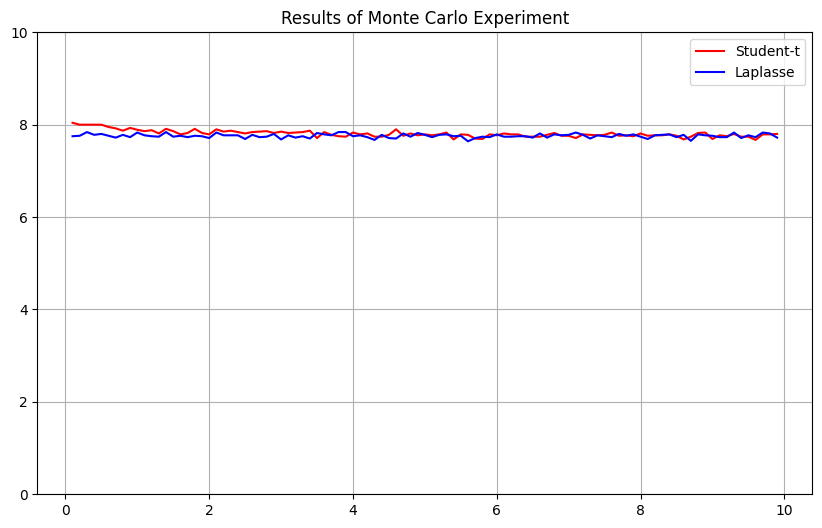

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(results_with_variable_betas_h1.keys(), results_with_variable_betas_h1.values(), linestyle='-', color='r',  label='Student-t')
plt.plot(results_with_variable_betas_h0.keys(), results_with_variable_betas_h0.values(), linestyle='-', color='b',  label='Laplasse')
plt.title('Results of Monte Carlo Experiment')
plt.ylim(0, 10)
plt.grid()
plt.legend()
plt.show()

Рассмотрим зависимость характеристик от количества соседей

In [7]:
number_neighbors = np.arange(1, 8, 1) #сгенерировали набор лямбд 
results_with_variable_k_h0 = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'distribution': 'h0_baseline'
         }

    results_with_variable_k_h0[k] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 7/7 [00:01<00:00,  5.10it/s]


In [8]:
results_with_variable_k_h1 = {}


for k in tqdm(number_neighbors, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': k,
            'distribution': 'h1_baseline'
         }

    results_with_variable_k_h1[k] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 7/7 [00:01<00:00,  4.93it/s]


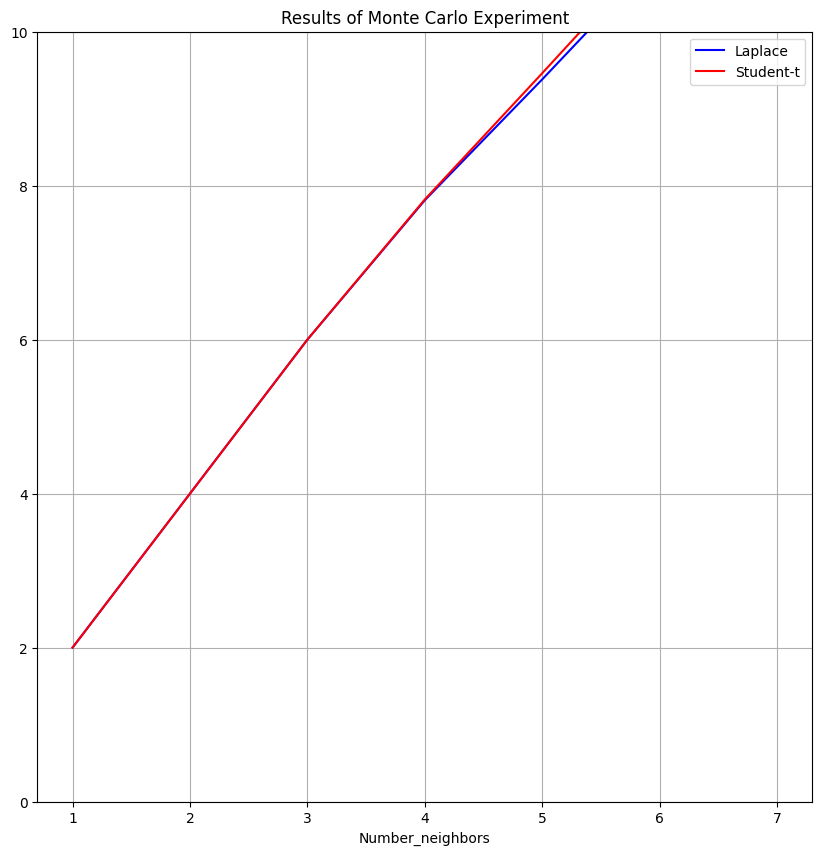

In [20]:
plt.figure(figsize=(10, 10))

plt.plot(results_with_variable_k_h0.keys(), results_with_variable_k_h0.values(), linestyle='-', color='b', label='Laplace')

plt.plot(results_with_variable_k_h1.keys(), results_with_variable_k_h1.values(), linestyle='-', color='r', label='Student-t')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylim(0, 10)
plt.grid()
plt.legend()
plt.show()

Теперь - dist граф

In [10]:
D = 0.5         # расстояние между вершинами
n_samples = 100     # число итераций
N = 200             # размер набора генерируемых данных
GRAPH_TYPE = 'dist'  # тип графа 

In [11]:
betas = np.arange(0.1, 5, 0.2) #сгенерировали набор бет 
results_with_variable_betas_h0 = {}


for l in tqdm(betas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': D,
            'lambda': l,
            'distribution': 'h0'
         }

    results_with_variable_betas_h0[l] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


In [13]:
results_with_variable_betas_h1 = {}


for l in tqdm(betas, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': K,
            'lambda': l,
            'distribution': 'h1'
         }

    results_with_variable_betas_h1[l] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 25/25 [00:31<00:00,  1.27s/it]


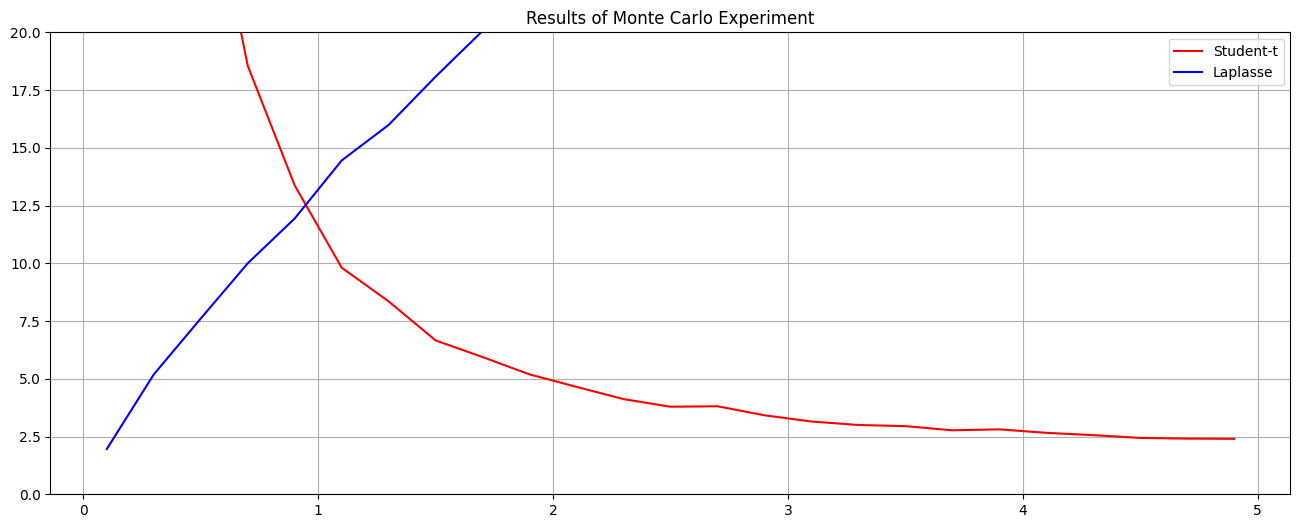

In [23]:
plt.figure(figsize=(16, 6))
plt.plot(results_with_variable_betas_h1.keys(), results_with_variable_betas_h1.values(), linestyle='-', color='r',  label='Student-t')
plt.plot(results_with_variable_betas_h0.keys(), results_with_variable_betas_h0.values(), linestyle='-', color='b',  label='Laplasse')
plt.title('Results of Monte Carlo Experiment')
plt.ylim(0, 20)
plt.grid()
plt.legend()
plt.show()

In [24]:
distance = np.arange(0.5, 8, 0.5) #сгенерировали набор расстояний
results_with_variable_k_h0 = {}


for d in tqdm(distance, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': d,
            'distribution': 'h0_baseline'
         }

    results_with_variable_k_h0[d] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 15/15 [00:19<00:00,  1.27s/it]


In [25]:
results_with_variable_k_h1 = {}


for d in tqdm(distance, desc="Processing"):
    params = {
            'graph_type': GRAPH_TYPE,
            'n': N,
            'x': d,
            'distribution': 'h1_baseline'
         }

    results_with_variable_k_h1[d] = monte_carlo_experiment(params, n_samples)

Processing: 100%|██████████| 15/15 [00:18<00:00,  1.24s/it]


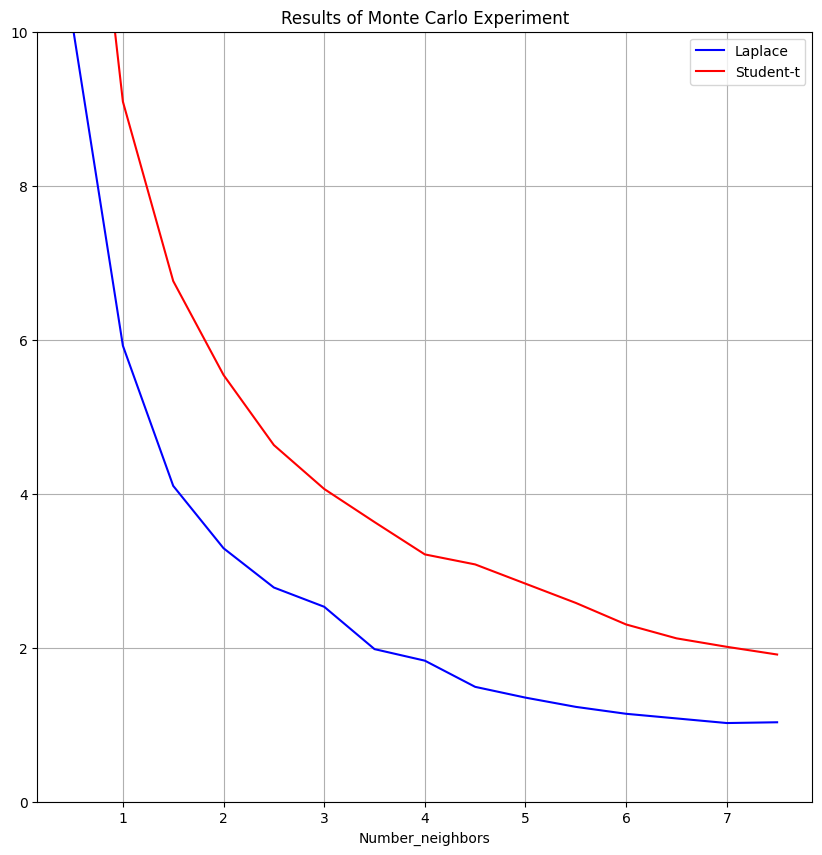

In [26]:
plt.figure(figsize=(10, 10))

plt.plot(results_with_variable_k_h0.keys(), results_with_variable_k_h0.values(), linestyle='-', color='b', label='Laplace')

plt.plot(results_with_variable_k_h1.keys(), results_with_variable_k_h1.values(), linestyle='-', color='r', label='Student-t')

plt.title('Results of Monte Carlo Experiment')
plt.xlabel('Number_neighbors')
plt.ylim(0, 10)
plt.grid()
plt.legend()
plt.show()